# Python - Exploratory Data Analysis on Spotify 2023 Dataset
## Name: Kyle Adrienne S. Hizon
## Section: 2ECE-A

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

### Spotify Rankings Overview Display

In [13]:
spotify = pd.read_csv('spotify-2023.csv', encoding='latin-1')
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### General Informations

#### Null Count and Datatype

In [32]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

#### Null Values Count

In [34]:
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

#### Rows and Columns Display

In [36]:
print(f"Rows: {spotify.shape[0]} \nColumns: {spotify.shape[1]}")

Rows: 953 
Columns: 24


 ### Statistics, Outliers, Trends, etc.

#### General Statistics

In [38]:
print("The following are the statistics of each column in the data gathered by the Spotify Rankings (Streams not included)\n")
spotify.describe()

The following are the statistics of each column in the data gathered by the Spotify Rankings (Streams not included)



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### STREAM STATISTICS: Mean, Median, and Standard Deviation

In [15]:
# Calculate for the statistics
mean = round(np.mean(spotify['streams']),2)
median = spotify['streams'].dropna().median()
std = round(np.std(spotify['streams']),2)

print(f"STREAM STATISTICS:\n\nMean: {mean}\nMedian: {median}\nStandard Deviation: {std}")

STREAM STATISTICS:

Mean: 514137424.94
Median: 290530915.0
Standard Deviation: 566559151.83


### Released Year and Artist Count Distribution Statistics

In [106]:
# Count occurrences of each release year and artists count
year_counts = spotify['released_year'].value_counts().sort_index()
artist_count_distribution = spotify['artist_count'].value_counts().sort_index()

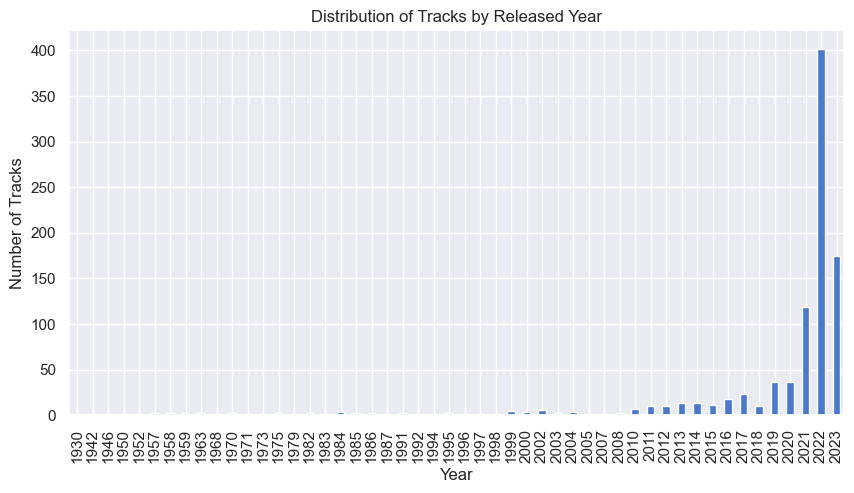

In [61]:
# Plot distribution of released years
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar')
plt.title('Distribution of Tracks by Released Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

##### Observed on the data above, there was a large spike of released tracks in year 2022. This shows that the year 2022 has the greatest amount of notable music that were released in that year. At the start of 2014, the popular musics and trends starts to rise

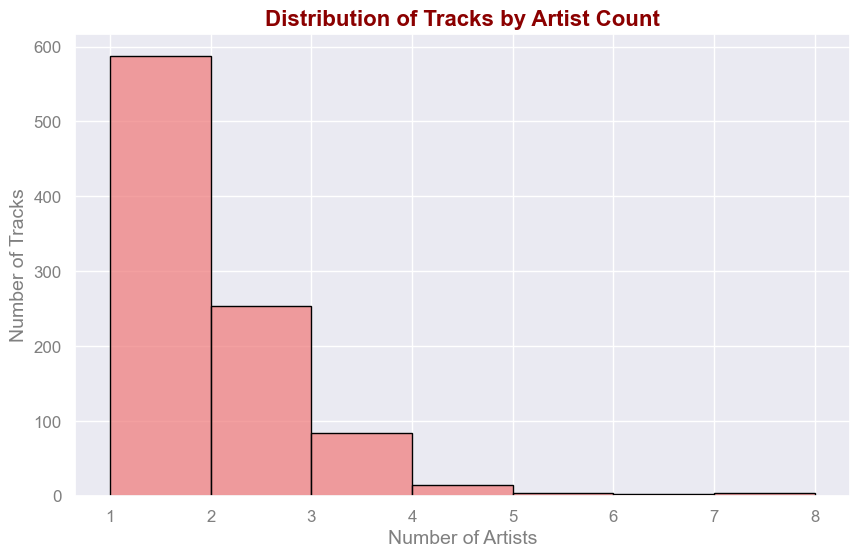

In [63]:
# Set the style and color palette for artist count distribution
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

# Plotting the distribution of artist counts
plt.figure(figsize=(10, 6))
sns.histplot(data=spotify, x='artist_count', binwidth=1, color="lightcoral", edgecolor="black")
plt.title("Distribution of Tracks by Artist Count", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Number of Artists", fontsize=14, color='gray')
plt.ylabel("Number of Tracks", fontsize=14, color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()

##### Observed on the data above, the distribution of tracks by artist count was found out that most tracks that were released were made solo. Though, there are still great numbers of tracks that were released with a collaboration with other artists.

### Top Performers in Spotify

#### Top 5 Songs in Spotify (2023)

In [10]:
spotify['streams'] = pd.to_numeric(spotify['streams'].astype(str).str.replace(',', ''), errors='coerce')
top_5_streams_df = spotify.sort_values(by='streams', ascending=False).head(5).reset_index(drop=True)
top_5_streams_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,125,"1,800",0,NaN,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,167,"3,595",6,NaN,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5


#### Top 5 Most Frequent Artist

In [13]:
top_artists = spotify['artist(s)_name'].str.split(', ').explode().value_counts().head(5)
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['Artist', 'Track Count']

top_artists_df

,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


### Temporal Trends

#### Yearly Trends

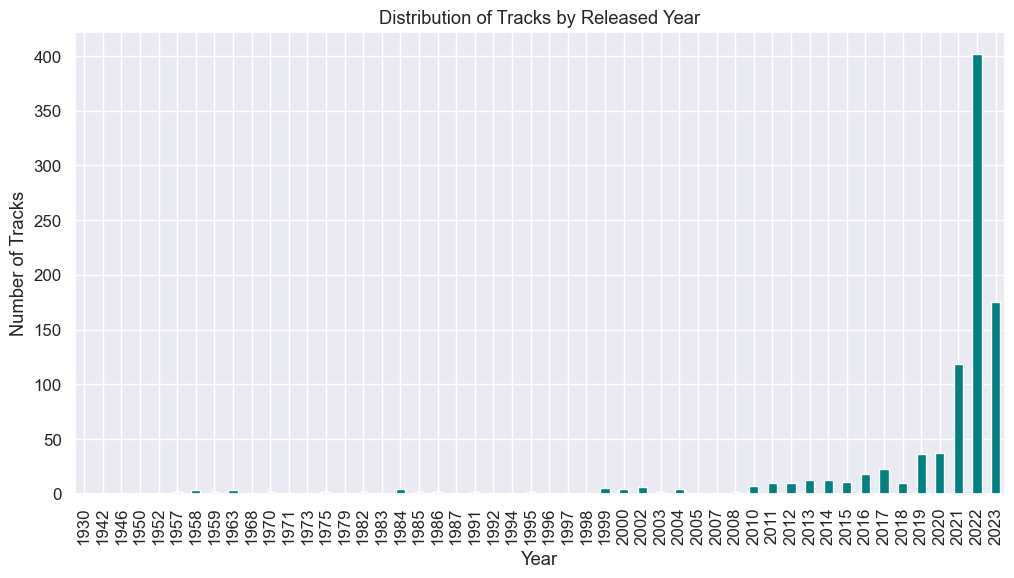

In [69]:
# Number of tracks by release year
tracks_per_year = spotify['released_year'].value_counts().sort_index()

# Plotting the trend over time
plt.figure(figsize=(12, 6))
tracks_per_year.plot(kind='bar', color='teal')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Tracks by Released Year')
plt.show()

##### Theres a significant trend of popular music that arisen back in year 2022

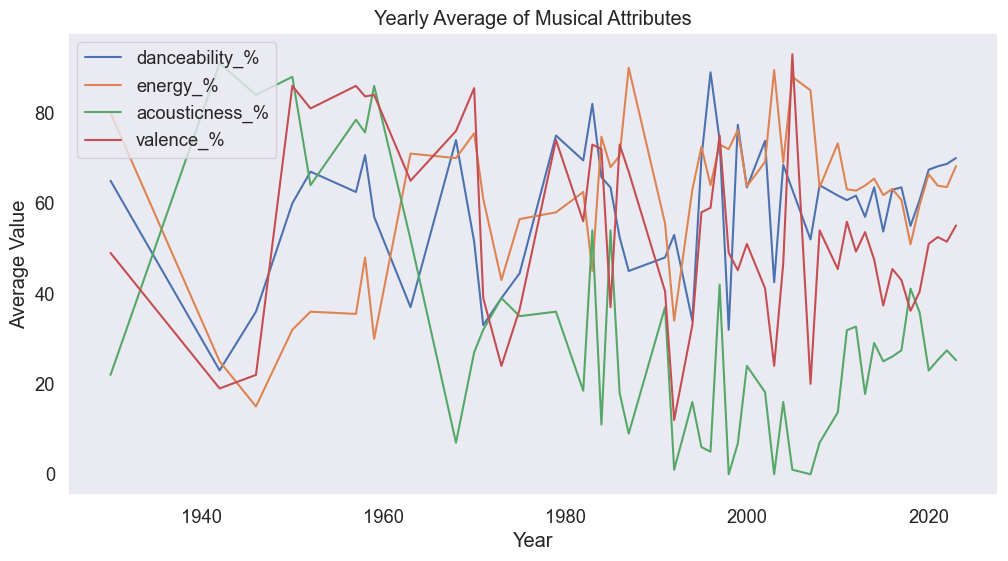

In [93]:
# Group by released_year and calculate the average of each musical attribute
attributes_by_year = spotify.groupby('released_year')[['danceability_%', 'energy_%', 'acousticness_%', 'valence_%']].mean()

# Plotting trends for each attribute
plt.figure(figsize=(12, 6))
for attribute in attributes_by_year.columns:
    plt.plot(attributes_by_year.index, attributes_by_year[attribute], label=attribute)

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Yearly Average of Musical Attributes')
plt.legend()
plt.show()

##### As year goes by, there 4 musical attributes are fighting for trends, as of 21th century, the leading characteristics are danceability and energy

#### Monthly Trends

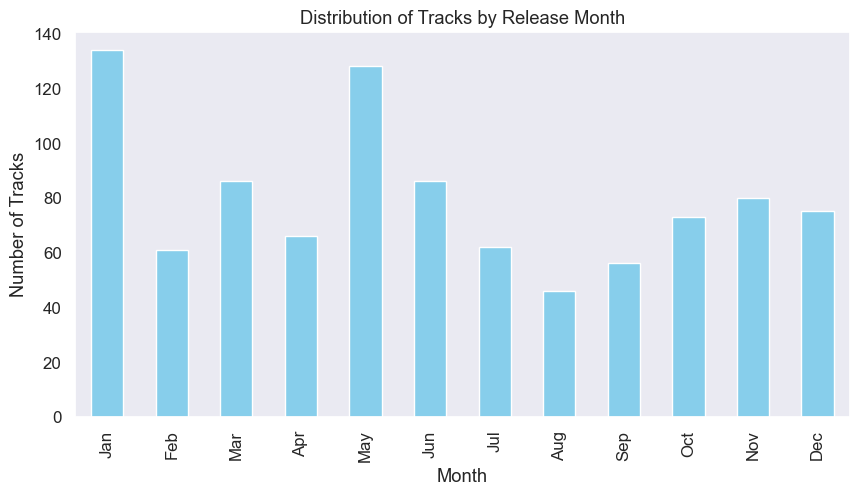

In [76]:
# Count the number of tracks by release month
tracks_per_month = spotify['released_month'].value_counts().sort_index()

# Plotting the trend by month
plt.figure(figsize=(10, 5))
tracks_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Tracks by Release Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### Based on the observed pattern, there has been a boom of popular music when its the month of January and May 

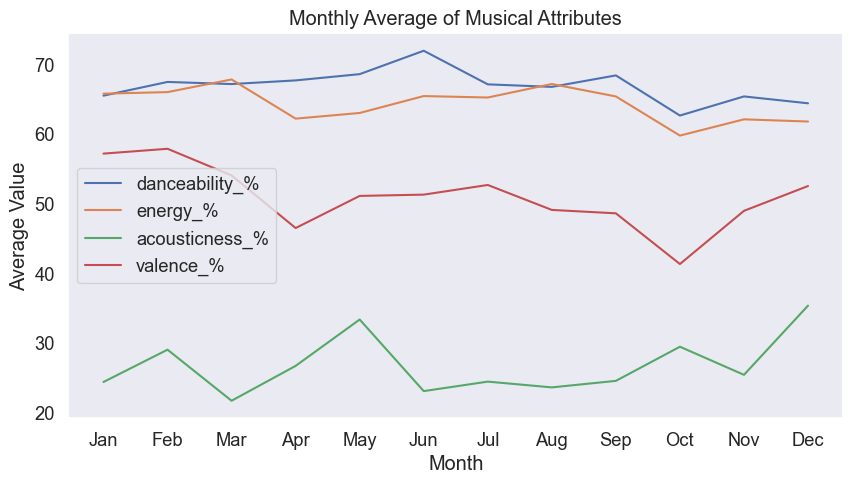

In [91]:
# Group by released_month and calculate the average of each musical attribute
attributes_by_month = spotify.groupby('released_month')[['danceability_%', 'energy_%', 'acousticness_%', 'valence_%']].mean()

# Plotting trends for each attribute
plt.figure(figsize=(10, 5))
for attribute in attributes_by_month.columns:
    plt.plot(attributes_by_month.index, attributes_by_month[attribute], label=attribute)

plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average of Musical Attributes')
plt.legend()
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### Based on the observed graph, there has been a consistent leading of danceability and energy as an attribute as months go by

### Genre and Music Characteristics

#### Stream and Attributes Correlation

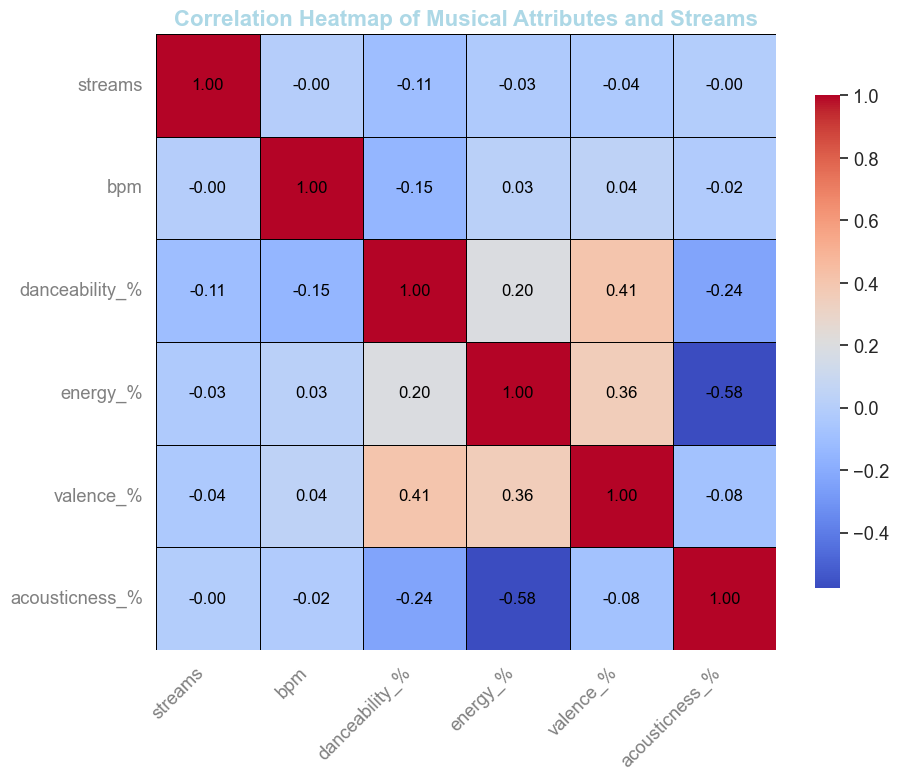

In [86]:
# Convert columns to numeric, coercing errors to NaN
columns_to_convert = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
for col in columns_to_convert:
    spotify[col] = pd.to_numeric(spotify[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = spotify[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()

# Set a dark style for the heatmap
sns.set(style="dark", font_scale=1.2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor="black",
            annot_kws={"size": 12, "color": "black"}, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Musical Attributes and Streams", fontsize=16, fontweight='bold', color='lightblue')
plt.xticks(rotation=45, ha='right', color='gray')
plt.yticks(rotation=0, color='gray')
plt.show()

##### In the heatmap that was constructed almost every attributes has negative correlation when its related to streams, meaning, characteristics has nothing to do with popularity because of the difference of preferences by other people

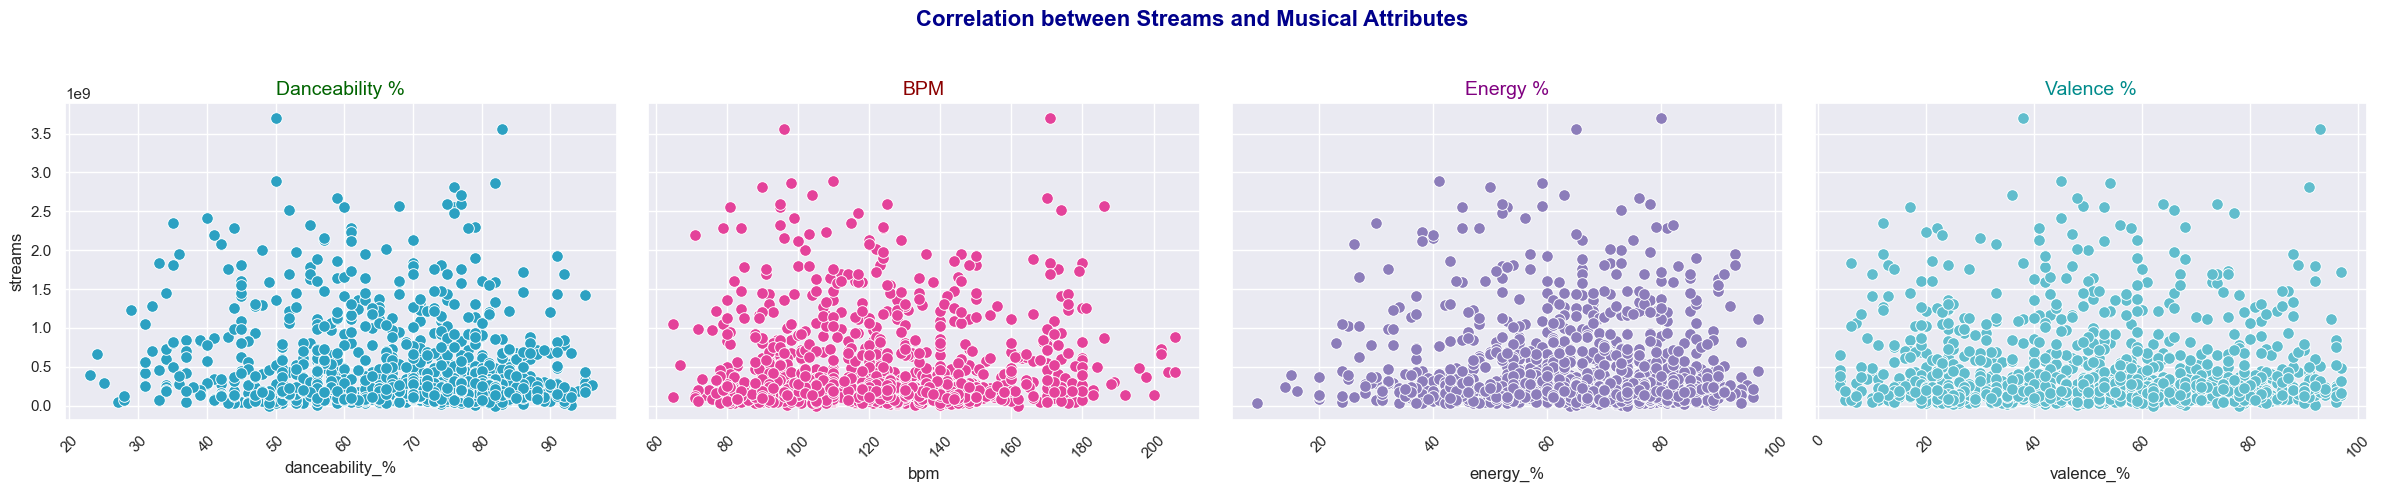

In [51]:
# Scatter plots with Streams and additional attribute Valence
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Streams vs Danceability
sns.scatterplot(ax=axes[0], x='danceability_%', y='streams', data=spotify)
axes[0].set_title("Streams vs Danceability %")

# Streams vs BPM
sns.scatterplot(ax=axes[1], x='bpm', y='streams', data=spotify)
axes[1].set_title("Streams vs BPM")

# Streams vs Energy
sns.scatterplot(ax=axes[2], x='energy_%', y='streams', data=spotify)
axes[2].set_title("Streams vs Energy %")

# Streams vs Valence
sns.scatterplot(ax=axes[3], x='valence_%', y='streams', data=spotify)
axes[3].set_title("Streams vs Valence %")

plt.tight_layout()
plt.show()

##### On the scatterplot that was constructed, there's no significant correlation of how different attributes should be to boost the count of streams on music, it is not correlated on how a music is going to be popular. This discovery has made a realization that it does not matter what characteristics in music a good music should be

#### Attributes Correlation

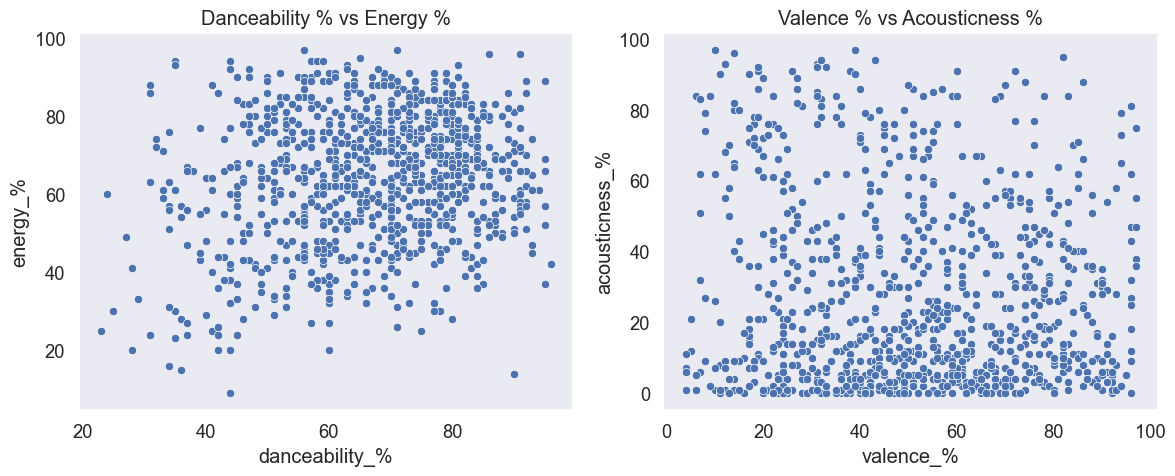

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Danceability vs Energy
sns.scatterplot(ax=axes[0], x='danceability_%', y='energy_%', data=spotify)
axes[0].set_title("Danceability % vs Energy %")

# Valence vs Acousticness
sns.scatterplot(ax=axes[1], x='valence_%', y='acousticness_%', data=spotify)
axes[1].set_title("Valence % vs Acousticness %")

plt.tight_layout()
plt.show()

##### There has been a good correlation when the comparison of danceability and energy takes place. Valence and acousticness almost has no correlation with each other as they are independent. An increase of danceability factor also increases the energy level of a music and vice versa

### Platform Popularity, Patterns, and Consistency

#### Platform Comparison

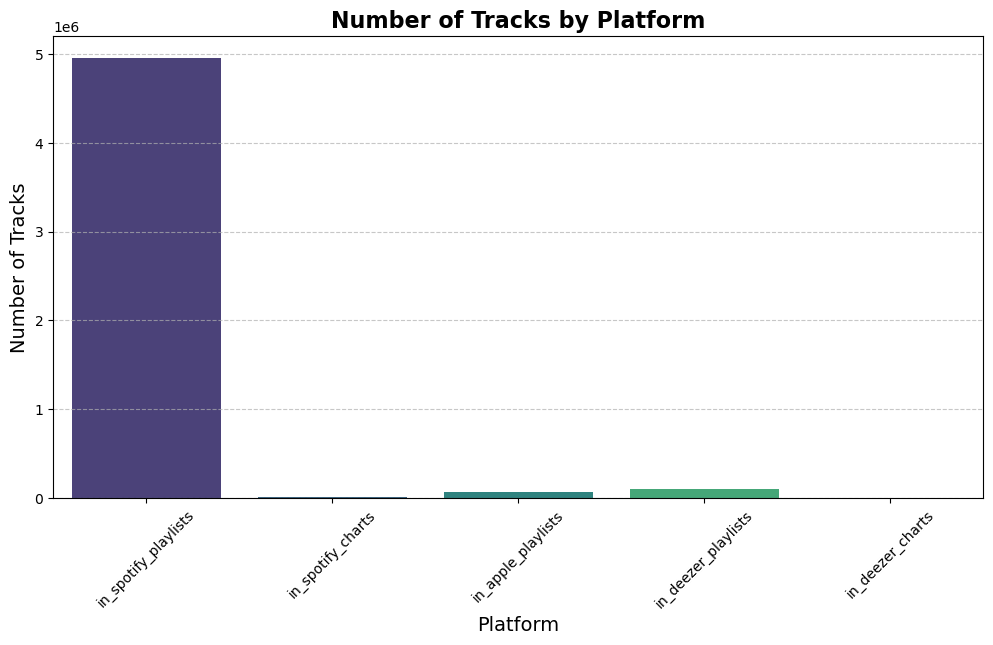

In [34]:
# Attempt to convert columns to numeric, setting errors='coerce' to convert non-numeric values to NaN
columns_to_convert = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists', 'in_deezer_charts']
spotify[columns_to_convert] = spotify[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Sum of tracks on different platforms
platform_data = spotify[columns_to_convert].sum().reset_index()
platform_data.columns = ['Platform', 'Count']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_data, x='Platform', y='Count', hue='Platform', dodge=False, palette='viridis')
plt.title('Number of Tracks by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Based on the bar graph that was shown, Spotify playlists has the most popular songs stored among all platforms

#### Keys Distribution

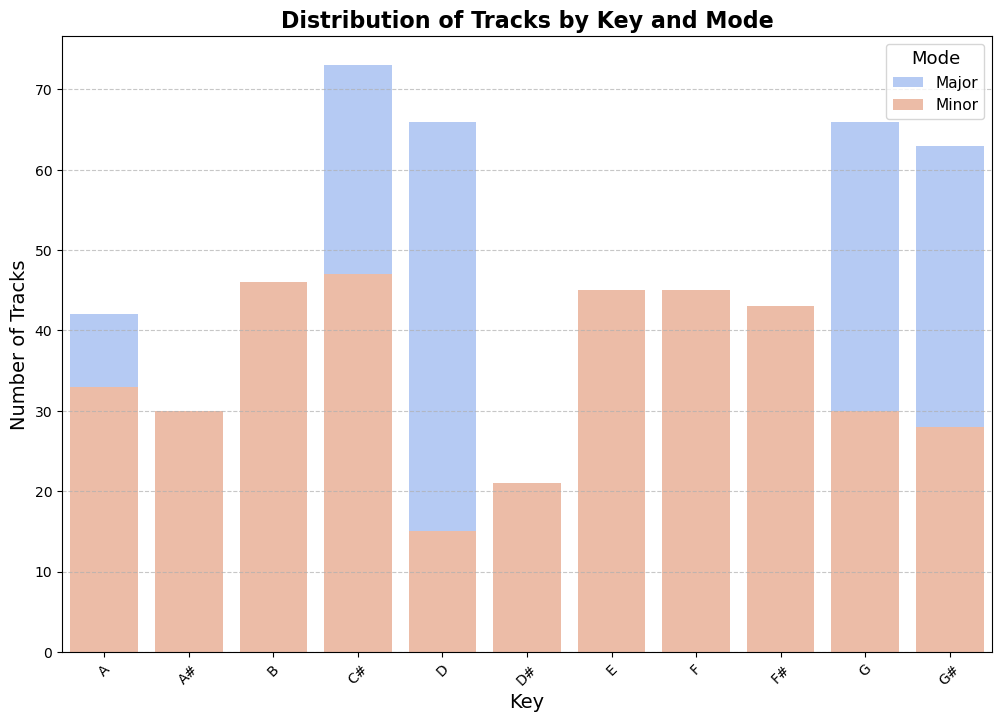

In [53]:
# Count of tracks by key and mode
key_mode_counts = spotify.groupby(['key', 'mode']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=key_mode_counts, x='key', y='Count', hue='mode', palette='coolwarm', dodge=False)
plt.title('Distribution of Tracks by Key and Mode', fontsize=16, fontweight='bold')
plt.xlabel('Key', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Mode', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

##### On the Bar Graph that was plotted, the C# has the most presence in the number of tracks for being either a Minor or Major; while D# is being the least used Minor and A being the least used Major

#### Top 10 Most Frequent Artists on Charts

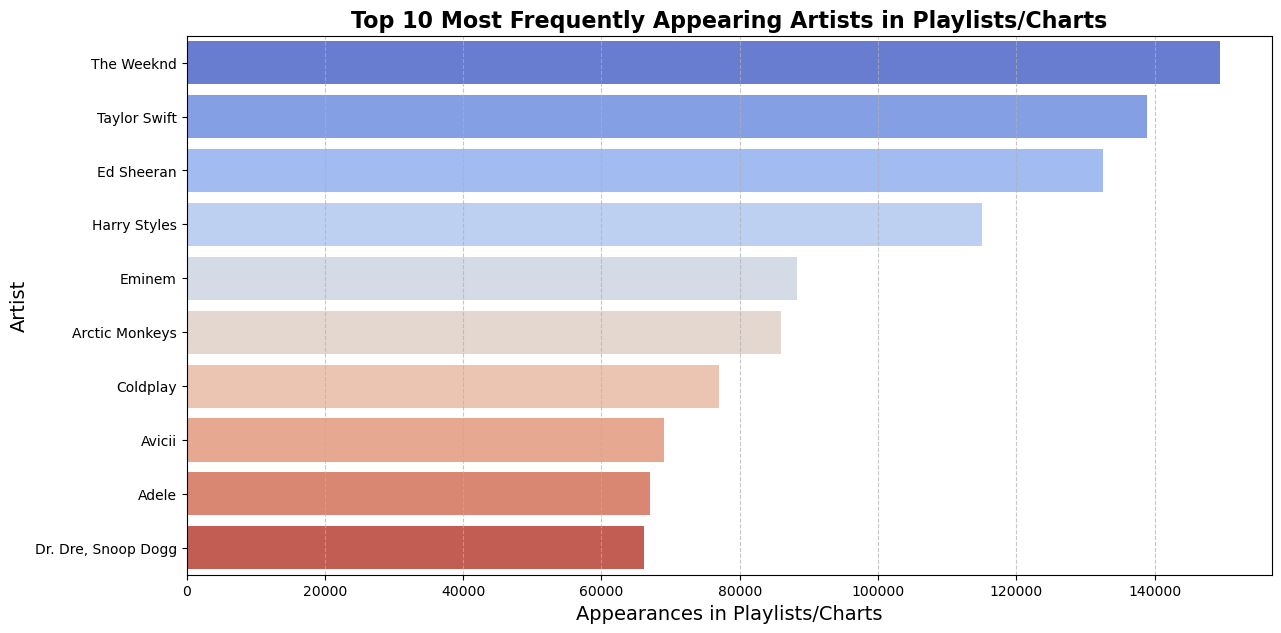

In [46]:
# Count the occurrences of each artist across all relevant columns
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
artist_counts = spotify.groupby("artist(s)_name")[platform_columns].sum().sum(axis=1).sort_values(ascending=False)

# Select the top 10 most frequently appearing artists in playlists and charts
top_artists = artist_counts.head(10).reset_index()
top_artists.columns = ['Artist', 'Appearances']

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=top_artists, x='Appearances', y='Artist', hue='Artist', dodge=False, palette="coolwarm", legend=False)
plt.title('Top 10 Most Frequently Appearing Artists in Playlists/Charts', fontsize=16, fontweight='bold')
plt.xlabel('Appearances in Playlists/Charts', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### The Top 3 Artists frequently appearing in playlist and charts are The Weeknd, Taylor Swift, and Ed Sheeran. They are known for their Pop, Romance, and RnB songs

### Conclusion

##### In this analysis, we have explored the dynamics of music streaming in 2023 through a comprehensive examination of the most streamed songs on Spotify, Apple Music, and Deezer. By delving into the dataset's overview and general information, we established a foundational understanding of the key characteristics and trends in the music landscape. Our statistical analysis highlighted significant patterns and outliers that reflect listener behavior, while the exploration of top performers showcased the factors contributing to success in the streaming realm. Additionally, we identified temporal trends and analyzed genre-specific characteristics to gain insights into how different attributes influence streaming popularity. Finally, our examination of platform popularity revealed distinct user engagement patterns across Spotify, Apple Music, and Deezer, emphasizing the competitive nature of the music streaming industry. Overall, this analysis provides valuable insights into the evolving preferences of music listeners and the factors that shape the success of tracks and artists across platforms.